# TWITTER DATA SENTIMENT ANALYSIS PROJECT

In [1]:
from temp_clean_tweets_dataframe import Clean_Tweets

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import json
import pandas as pd
from textblob import TextBlob

In [4]:
def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    return len(tweets_data), tweets_data


class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        self.tweets_list = tweets_list
        

    # an example function
    def find_statuses_count(self)->list:
        statuses_count = [i['user']['statuses_count'] for i in self.tweets_list]
        return statuses_count 
        
        
    def find_full_text(self)->list:
        text = list()
        for tweet in self.tweets_list:
            if 'retweeted_status' in tweet.keys() and 'extended_tweet' in tweet['retweeted_status'].keys():
                text.append(tweet['retweeted_status']['extended_tweet']['full_text'])
            else: text.append('Empty') 
        return text

       
    def find_sentiments(self, text)->list:
        polarity, subjectivity = [], []
        for tweet in text:
            blob = TextBlob(tweet)
            sentiment = blob.sentiment
            polarity.append(sentiment.polarity)
            subjectivity.append(sentiment.subjectivity)
        return polarity, subjectivity
    

    def find_created_time(self)->list:
        created_at = [x['created_at'] for x in self.tweets_list]
        return created_at
    

    def find_source(self)->list:
        source = [i['source'] for i in self.tweets_list]
        return source
    

    def find_screen_name(self)->list:
        screen_name = [i['user']['screen_name'] for i in self.tweets_list]
        return screen_name
    

    def find_followers_count(self)->list:
        followers_count = [i['user']['followers_count'] for i in self.tweets_list]
        return followers_count 
    

    def find_friends_count(self)->list:
        friends_count = [i['user']['friends_count'] for i in self.tweets_list]
        return friends_count
    

    def is_sensitive(self)->list:
        try:
            is_sensitive = [x['possibly_sensitive'] for x in self.tweets_list]
        except KeyError:
            is_sensitive = None
        return is_sensitive
    

    def find_favourite_count(self)->list:
        favorite_count = []
        for tweet in self.tweets_list:
            if 'retweeted_status' in tweet.keys():
                favorite_count.append(tweet['retweeted_status']['favorite_count'])
            else: favorite_count.append(0)
        return favorite_count
    
    
    def find_retweet_count(self)->list:
        retweet_count = []
        for tweet in self.tweets_list:
            if 'retweeted_status' in tweet.keys():
                retweet_count.append(tweet['retweeted_status']['retweet_count'])
            else: retweet_count.append(0)
        return retweet_count
    

    def find_hashtags(self)->list:
        hashtags = list()
        for i in self.tweets_list:
            hashtags.append(", ".join([hashtag_item['text'] for hashtag_item in i['entities']['hashtags']]))
        return hashtags
    

    def find_mentions(self)->list:
        mentions = list()
        for i in self.tweets_list:
            mentions.append( ", ".join([mention['screen_name'] for mention in i['entities']['user_mentions']]))
        return mentions


    def find_location(self)->list:
        try:
            location = self.tweets_list['user']['location']
        except TypeError:
            location = ''
        return location
    
    
    def find_lang(self)->list:
        lang = [i['lang'] for i in self.tweets_list]
        return lang
    
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = {'created_at':created_at, 'source':source, 'text':text, 'polarity':polarity, 'subjectivity':subjectivity, 'lang':lang, 'fav_count':fav_count, 'retweet_count':retweet_count, 'screen_name':screen_name, 'follower_count':follower_count, 'friends_count':friends_count, 'sensitivity':sensitivity, 'hashtags':hashtags, 'mentions':mentions, 'location':location}
        df = pd.DataFrame(data=data, columns=columns)

        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df 

In [5]:
if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    
    _, tweet_list = read_json("data/Economic_Twitter_Data.json")
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 

In [6]:
tweet_df.shape

(24625, 15)

In [7]:
ct = Clean_Tweets(tweet_df)

Automation in Action...!!!


In [8]:
tweet_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,de,NaN,355,NaN,NaN,12,NaN,,NaN,NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,de,NaN,505,NaN,NaN,12,NaN,,NaN,NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,de,NaN,4,NaN,NaN,12,NaN,,NaN,NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,de,NaN,332,NaN,NaN,12,NaN,"Deutschen, Spritpreisen, inflation, Abgaben",NaN,NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,de,NaN,386,NaN,NaN,12,NaN,,NaN,NaN


# Exploratory Data Analysis

In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       0 non-null      object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      0 non-null      object 
 7   retweet_count       24625 non-null  int64  
 8   original_author     0 non-null      object 
 9   followers_count     0 non-null      object 
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  0 non-null      object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       0 non-null      object 
 14  place               0 non-null      object 
dtypes: float64(2), int64(2), object(11)
memory usage: 2.8

In [10]:
df_new = ct.convert_to_datetime(tweet_df)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24514 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          24514 non-null  datetime64[ns, UTC]
 1   source              24514 non-null  object             
 2   original_text       0 non-null      object             
 3   polarity            24514 non-null  float64            
 4   subjectivity        24514 non-null  float64            
 5   lang                24514 non-null  object             
 6   favorite_count      0 non-null      object             
 7   retweet_count       24514 non-null  int64              
 8   original_author     0 non-null      object             
 9   followers_count     0 non-null      object             
 10  friends_count       24514 non-null  int64              
 11  possibly_sensitive  0 non-null      object             
 12  hashtags            24514 non-nu

In [12]:
df_new = ct.remove_non_english_tweets(df_new)

In [13]:
df_new.shape

(16374, 15)

In [14]:
df_new.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
38,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,43,NaN,NaN,55,NaN,"gold, silver, crypto",NaN,NaN
39,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,32,NaN,NaN,55,NaN,,NaN,NaN
41,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,26,NaN,NaN,55,NaN,,NaN,NaN
42,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,213,NaN,NaN,55,NaN,,NaN,NaN
43,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,417,NaN,NaN,55,NaN,,NaN,NaN


In [15]:
df_new.describe()

,polarity,subjectivity,retweet_count,friends_count
count,1.637400e+04,16374.0,16374.000000,16374.000000
mean,-1.000000e-01,0.5,626.303286,1337.912056
std,2.405094e-14,0.0,7104.395997,2975.315626
min,-1.000000e-01,0.5,0.000000,0.000000
25%,-1.000000e-01,0.5,0.000000,113.000000
50%,-1.000000e-01,0.5,0.000000,437.000000
75%,-1.000000e-01,0.5,32.000000,1433.000000
max,-1.000000e-01,0.5,434379.000000,41866.000000


In [16]:
df_new.reset_index(inplace=True, drop=True)

In [17]:
df_new.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,43,NaN,NaN,55,NaN,"gold, silver, crypto",NaN,NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,32,NaN,NaN,55,NaN,,NaN,NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,26,NaN,NaN,55,NaN,,NaN,NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,213,NaN,NaN,55,NaN,,NaN,NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",NaN,-0.1,0.5,en,NaN,417,NaN,NaN,55,NaN,,NaN,NaN


In [18]:
df_new.isna().sum()

created_at                0
source                    0
original_text         16374
polarity                  0
subjectivity              0
lang                      0
favorite_count        16374
retweet_count             0
original_author       16374
followers_count       16374
friends_count             0
possibly_sensitive    16374
hashtags                  0
user_mentions         16374
place                 16374
dtype: int64

In [19]:
df2 = df_new.dropna(axis=1)

In [20]:
df2.head()

,created_at,source,polarity,subjectivity,lang,retweet_count,friends_count,hashtags
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",-0.1,0.5,en,43,55,"gold, silver, crypto"
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",-0.1,0.5,en,32,55,
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",-0.1,0.5,en,26,55,
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",-0.1,0.5,en,213,55,
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",-0.1,0.5,en,417,55,


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16374 entries, 0 to 16373
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   created_at     16374 non-null  datetime64[ns, UTC]
 1   source         16374 non-null  object             
 2   polarity       16374 non-null  float64            
 3   subjectivity   16374 non-null  float64            
 4   lang           16374 non-null  object             
 5   retweet_count  16374 non-null  int64              
 6   friends_count  16374 non-null  int64              
 7   hashtags       16374 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 1023.5+ KB


In [22]:
df2.isna().sum()

created_at       0
source           0
polarity         0
subjectivity     0
lang             0
retweet_count    0
friends_count    0
hashtags         0
dtype: int64

In [23]:
df2.to_csv('twitter_data.csv')

In [24]:
df2.describe()

,polarity,subjectivity,retweet_count,friends_count
count,1.637400e+04,16374.0,16374.000000,16374.000000
mean,-1.000000e-01,0.5,626.303286,1337.912056
std,2.405094e-14,0.0,7104.395997,2975.315626
min,-1.000000e-01,0.5,0.000000,0.000000
25%,-1.000000e-01,0.5,0.000000,113.000000
50%,-1.000000e-01,0.5,0.000000,437.000000
75%,-1.000000e-01,0.5,32.000000,1433.000000
max,-1.000000e-01,0.5,434379.000000,41866.000000


In [25]:
df2[['polarity','subjectivity','retweet_count','friends_count']]

,polarity,subjectivity,retweet_count,friends_count
0,-0.1,0.5,43,55
1,-0.1,0.5,32,55
2,-0.1,0.5,26,55
3,-0.1,0.5,213,55
4,-0.1,0.5,417,55
...,...,...,...,...
16369,-0.1,0.5,300,643
16370,-0.1,0.5,5006,643
16371,-0.1,0.5,973,643
16372,-0.1,0.5,115,643


# HASHTAGS

In [26]:
top_hashtag = df2['hashtags'].value_counts().head(11)
top_hashtag

                                                                       11123
MarvinInu                                                                102
NewIndia                                                                  71
inflation, economy, biden, dollar, gold                                   43
OANN                                                                      41
Bitcoin                                                                   37
petrol, cheap, cheappetrol, fuel, cheapfuel, fuelprice, petrolprice       32
inflation                                                                 31
proofofstake, ethereum                                                    31
Mehangai, fuel, Android                                                   29
FCF                                                                       25
Name: hashtags, dtype: int64

In [27]:
hashtag_df = top_hashtag.to_frame()

In [28]:
hashtag_df = hashtag_df.iloc[1:]
hashtag_df

,hashtags
MarvinInu,102
NewIndia,71
"inflation, economy, biden, dollar, gold",43
OANN,41
Bitcoin,37
"petrol, cheap, cheappetrol, fuel, cheapfuel, fuelprice, petrolprice",32
inflation,31
"proofofstake, ethereum",31
"Mehangai, fuel, Android",29
FCF,25


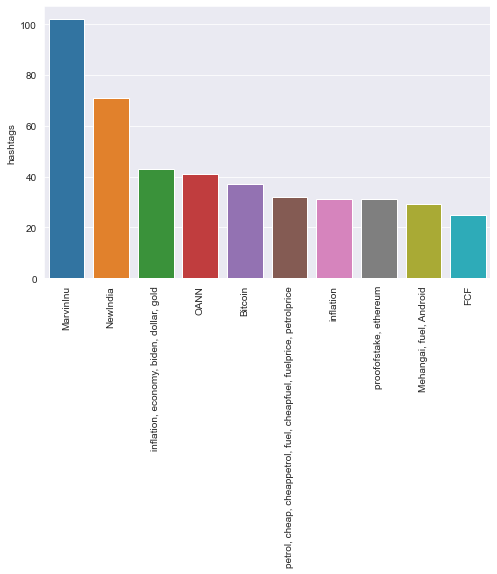

In [29]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.barplot(data=hashtag_df, x=hashtag_df.index, y='hashtags')
plt.xticks(rotation=90)
plt.show()

# PORALITY AND SUBJECTIVITY

In [30]:
df2.polarity.value_counts()

-0.1    16374
Name: polarity, dtype: int64

In [31]:
df2.subjectivity.value_counts()

0.5    16374
Name: subjectivity, dtype: int64

In [32]:
df2.friends_count.value_counts()

4        189
0        183
36       152
44       142
82       139
        ... 
98         1
580        1
96         1
10514      1
221        1
Name: friends_count, Length: 394, dtype: int64

``The polarity has only a single value which is -1 and subjectivity has only one value which is 0.5. it can't be used to understand what the people really think.``

In [33]:
corr = df2[['retweet_count', 'friends_count']].corr()
corr

,retweet_count,friends_count
retweet_count,1.0000,0.0036
friends_count,0.0036,1.0000


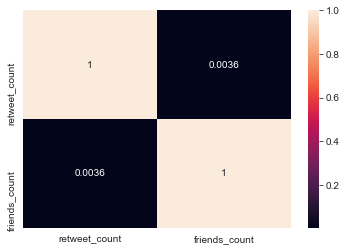

In [34]:
sns.heatmap(corr, annot=True);

``Also correlation between the number of retweets and the number of friends is insignificant``

                            ---END---